## NEURAL NETWORKS WITH PYTHON AND COMPARISON WITH OTHER ALGORITHMS
For this project i will be working with Hotel Reservation Dataset from Kaggle.
A significant number of hotel reservations are called off due to cancellations or no-show. There are several reasons for concellation. it is a classification based project where i will be predicting the individuals that would honor the reservation or cancel it.
I will follow the approach of Neural networks to find the results and compare it with other algorithms. ##


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Hotel Reservations.csv')

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [36]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [35]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [34]:
#NO null values,this makes our work easier. However i noticed a 'not selected' in the type_of_meal_plan column. 
#I could assume this to be a null value and attempt to fill it up, or it could be intentional and would add more insight to my model.
#I would leave it as it is.


In [37]:
df.corr()
#Any two identical columns would be a problem and one would need to be removed. everything is good here

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


# EDA


<AxesSubplot:>

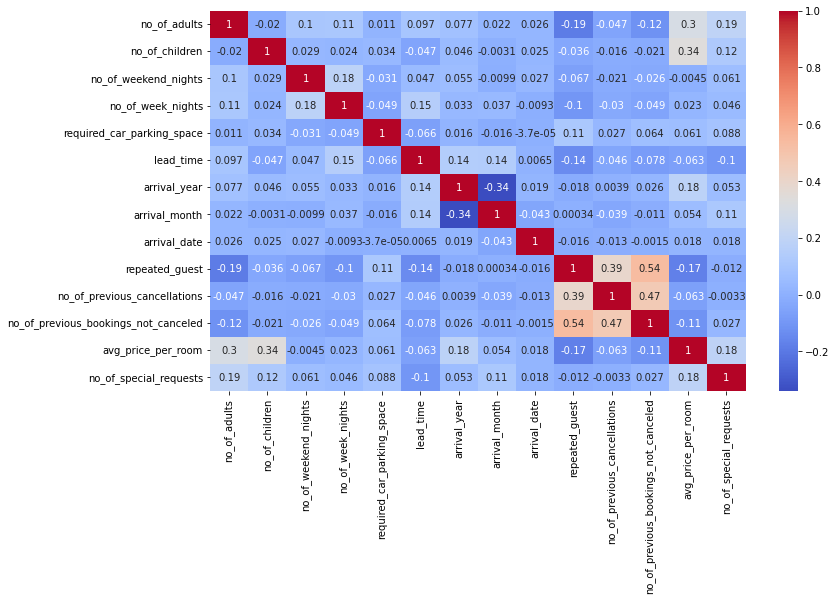

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='booking_status', ylabel='count'>

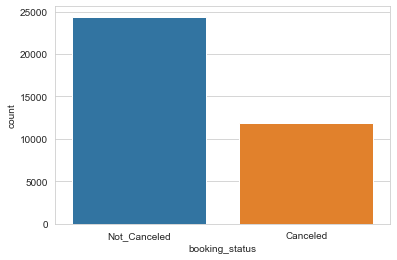

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status',data=df)

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

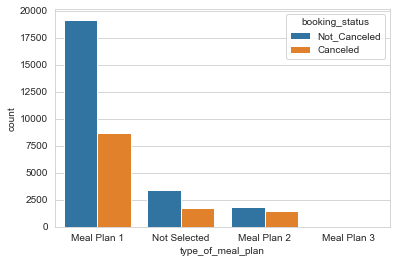

In [51]:
sns.countplot(x='type_of_meal_plan',data=df, hue='booking_status')

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

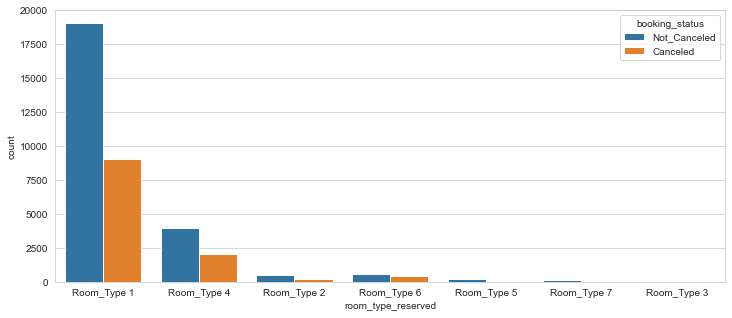

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x='room_type_reserved',data=df, hue='booking_status')

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

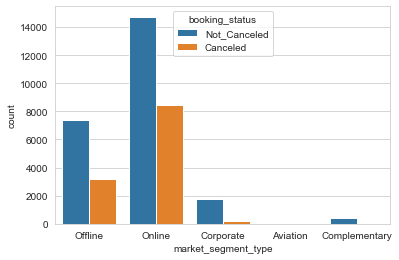

In [54]:
sns.countplot(x='market_segment_type',data=df, hue='booking_status')

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

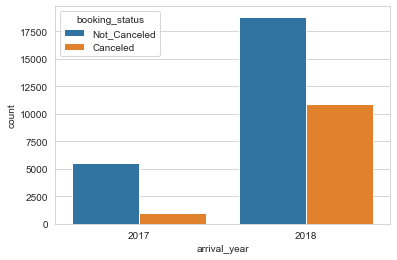

In [55]:
sns.countplot(x='arrival_year',data=df, hue='booking_status')

<AxesSubplot:xlabel='avg_price_per_room'>

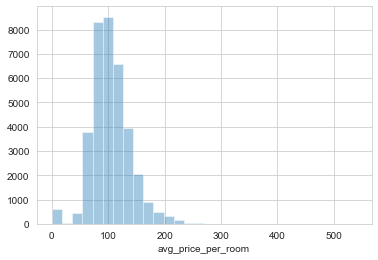

In [57]:
sns.distplot(df['avg_price_per_room'],kde=False,bins=30)

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

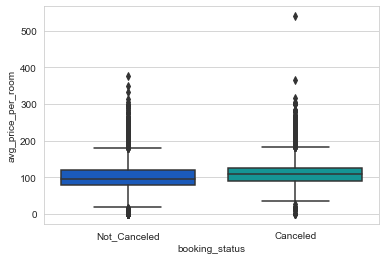

In [58]:
sns.boxplot(x='booking_status',y='avg_price_per_room',data=df,palette='winter')

# data cleaning and converting categorical features


In [59]:
#Booking_Id and arrival_date have no significance to the model and would be dropped

In [60]:
df.drop(['Booking_ID','arrival_date'],axis = 1, inplace = True)

In [63]:
#converting booking_status to 0 and 1
df['booking_status']=df['booking_status'].replace(['Not_Canceled', 'Canceled'],[1,0])

In [64]:
#converting arrival_month to string,so as to change it to dummy variables
df['arrival_month']=df['arrival_month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

In [65]:
#converting categorical features to dummy variables
dummies = pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved','arrival_month','market_segment_type','arrival_year']],drop_first=True)
df = df.drop(['type_of_meal_plan', 'room_type_reserved','arrival_month','market_segment_type','arrival_year'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'arrival_year',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'arrival_month_aug',
       'arrival_month_dec', 'arrival_month_feb', 'arrival_month_jan',
       'arrival_month_jul', 'arrival_month_jun', 'arrival_month_mar',
       'arrival_month_may', 'arrival_month_nov', 'arrival_month_oct',
       'arrival_month_sep', 'market_segment_type_Complementary',
       'market_segment_type_Corporat

# building a neural network

In [68]:
X = df.drop('booking_status',axis=1).values
Y = df['booking_status'].values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X.shape

(36275, 36)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [72]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [77]:
model = Sequential()



# input layer
model.add(Dense(36,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(9, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [80]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=250,
          validation_data=(X_test, y_test),callbacks=[early_stop] 
          )

Epoch 1/600
117/117 [==============================] - 5s 7ms/step - loss: 0.6143 - val_loss: 0.5211
Epoch 2/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4793 - val_loss: 0.4276
Epoch 3/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4376 - val_loss: 0.4125
Epoch 4/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4237 - val_loss: 0.4036
Epoch 5/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4152 - val_loss: 0.3987
Epoch 6/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4081 - val_loss: 0.3943
Epoch 7/600
117/117 [==============================] - 0s 4ms/step - loss: 0.4013 - val_loss: 0.3894
Epoch 8/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3947 - val_loss: 0.3832
Epoch 9/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3896 - val_loss: 0.3764
Epoch 10/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3848 - val_lo

117/117 [==============================] - 0s 4ms/step - loss: 0.3136 - val_loss: 0.3123
Epoch 82/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3132 - val_loss: 0.3128
Epoch 83/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3134 - val_loss: 0.3112
Epoch 84/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3144 - val_loss: 0.3114
Epoch 85/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3145 - val_loss: 0.3100
Epoch 86/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3127 - val_loss: 0.3110
Epoch 87/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3119 - val_loss: 0.3084
Epoch 88/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3116 - val_loss: 0.3094
Epoch 89/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3131 - val_loss: 0.3095
Epoch 90/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3118 - val_loss: 

Epoch 161/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2991 - val_loss: 0.2999
Epoch 162/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2968 - val_loss: 0.3006
Epoch 163/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2967 - val_loss: 0.3020
Epoch 164/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2971 - val_loss: 0.2997
Epoch 165/600
117/117 [==============================] - 1s 4ms/step - loss: 0.2973 - val_loss: 0.3020
Epoch 166/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2974 - val_loss: 0.3012
Epoch 167/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2961 - val_loss: 0.3014
Epoch 168/600
117/117 [==============================] - 0s 4ms/step - loss: 0.2993 - val_loss: 0.2992
Epoch 169/600
117/117 [==============================] - 0s 4ms/step - loss: 0.3005 - val_loss: 0.2998
Epoch 170/600
117/117 [==============================] - 0s 4ms/step - lo

In [81]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

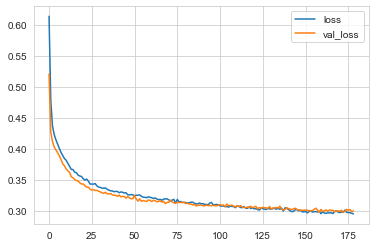

In [82]:
losses[['loss','val_loss']].plot()

In [83]:
predictions =  (model.predict(X_test)>0.4).astype('int32')

227/227 [==============================] - 1s 2ms/step


# Evaluating

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      2364
           1       0.87      0.94      0.91      4891

    accuracy                           0.87      7255
   macro avg       0.86      0.83      0.84      7255
weighted avg       0.87      0.87      0.86      7255



In [86]:
confusion_matrix(y_test,predictions)

array([[1682,  682],
       [ 283, 4608]], dtype=int64)

# Using Logistic regression

In [87]:
X = df.drop('booking_status',axis=1)
Y = df['booking_status']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [89]:
scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2364
           1       0.84      0.89      0.86      4891

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255



In [96]:
confusion_matrix(y_test,predictions)

array([[1522,  842],
       [ 534, 4357]], dtype=int64)

In [97]:
#Logistic Regression did much poorly than neural network

# K Nearest Neighbours

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors=10)

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [101]:
pred = knn.predict(X_test)

In [102]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2364
           1       0.89      0.89      0.89      4891

    accuracy                           0.85      7255
   macro avg       0.83      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255



In [103]:
print(confusion_matrix(y_test,pred))

[[1833  531]
 [ 548 4343]]


# Decision trees and Random forests

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
predictions = dtree.predict(X_test)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2364
           1       0.91      0.90      0.90      4891

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [109]:
print(confusion_matrix(y_test,predictions))

[[1915  449]
 [ 511 4380]]


In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [111]:
rfc_pred = rfc.predict(X_test)

In [112]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2364
           1       0.92      0.94      0.93      4891

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [113]:
print(confusion_matrix(y_test,predictions))

[[1915  449]
 [ 511 4380]]


# SVM

In [114]:
from sklearn.svm import SVC

In [115]:
model = SVC()

In [116]:
model.fit(X_train,y_train)

SVC()

In [117]:
predictions = model.predict(X_test)

In [118]:
print(confusion_matrix(y_test,predictions))

[[1637  727]
 [ 493 4398]]


In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2364
           1       0.86      0.90      0.88      4891

    accuracy                           0.83      7255
   macro avg       0.81      0.80      0.80      7255
weighted avg       0.83      0.83      0.83      7255



From the above algorithms and their evaluation, the following can be deduced:
-All the models did well except maybe logistic regression
-There really is'nt a 'best algorithm' out there, there's only an algorithm that would be best suited to a particular problem

In this case, neural network, decision trees and random forest were the best performers and were very close.But to choose which to go for, one would have to understand what the employer is really looking for. As you can see, neural networks did a better job predicting those that honored their booking, where as decision trees and random forests did a better job predicting those that cancelled their booking. So if the employer prioritises identifying those that would honor their booking, neural networks would be the prefered model to use and vice versa.